# Explore here

In [1437]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle


In [1512]:
df = pd.read_csv("~/Documents/Bootcamp/flask-render-integration/data/raw/world_AQI.csv")
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [1439]:
df.shape

(16695, 14)

In [1440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [1441]:
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [1442]:
df.dropna(inplace=True)

In [1443]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

In [1444]:
duplicate = df.duplicated().sum()
duplicate

np.int64(0)

AQI Value = numerical representation of air quality 
AQI Category = AQI Category: The qualitative category of the AQI value, indicating the level of health concern (such as "Good", "Moderate", "Unhealthy", etc.).
CO AQI Value' = The AQI value specifically for Carbon Monoxide (CO) in the given location.
Example: 45 (this value represents only the contribution of CO to the overall AQI)
CO AQI Category = The AQI category for Carbon Monoxide (CO), indicating the level of health concern based on CO levels.
Example: "Good", "Moderate
Ozone AQI Value = The AQI value for Ozone (O₃) in the given location
Ozone AQI Category: The AQI category for Ozone (O₃), indicating the level of health concern based on Ozone levels.

Example: "Moderate", "Unhealthy for Sensitive Groups"
NO2 AQI Value: The AQI value for Nitrogen Dioxide (NO₂) in the given location.

Example: 30
NO2 AQI Category: The AQI category for Nitrogen Dioxide (NO₂), indicating the level of health concern based on NO₂ levels.

Example: "Good"
PM2.5 AQI Value: The AQI value for particulate matter with a diameter of 2.5 micrometers or smaller (PM2.5), a significant contributor to air pollution.
Example: 120

PM2.5 AQI Category: The AQI category for PM2.5, indicating the level of health concern based on the concentration of fine particulate matter.
Example: "Unhealthy for Sensitive Groups"




In [1445]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [1446]:
df['PM2.5 AQI Value']


0        51
1        41
2        41
3        66
4        20
         ..
16690    54
16691    71
16692    71
16693    50
16694    71
Name: PM2.5 AQI Value, Length: 16393, dtype: int64

In [1447]:
categorical = df.select_dtypes(exclude=np.number)
categorical.tail()

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
16690,United States of America,Highland Springs,Moderate,Good,Good,Good,Moderate
16691,Slovakia,Martin,Moderate,Good,Good,Good,Moderate
16692,Slovakia,Martin,Moderate,Good,Good,Good,Moderate
16693,France,Sceaux,Good,Good,Good,Good,Good
16694,United States of America,Westerville,Moderate,Good,Good,Good,Moderate


AQI Category

In [1448]:
df['AQI Category'].info()

<class 'pandas.core.series.Series'>
Index: 16393 entries, 0 to 16694
Series name: AQI Category
Non-Null Count  Dtype 
--------------  ----- 
16393 non-null  object
dtypes: object(1)
memory usage: 256.1+ KB


In [1449]:
type(df['AQI Category'].iloc[0])

str

In [1450]:
df['AQI Category'].unique()
df['CO AQI Category'].unique()
df['Ozone AQI Category'].unique()
df['NO2 AQI Category'].unique()
df['PM2.5 AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [1451]:
aqi_columns = [
    'AQI Category',
    'CO AQI Category',
    'Ozone AQI Category',
    'NO2 AQI Category',
    'PM2.5 AQI Category'
]

In [1452]:
df_encoded = df.copy()

In [1453]:
AQI_category_order = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]

In [1454]:
mappings = []

for col in aqi_columns:
    col_categories = df[col].dropna().unique()
    col_mapping = {category: idx for idx, category in enumerate(AQI_category_order) if category in col_categories}
    mappings.append({'col': col, 'mapping': col_mapping})
    print(f"Mapping for '{col}': {col_mapping}")


Mapping for 'AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}
Mapping for 'CO AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2}
Mapping for 'Ozone AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4}
Mapping for 'NO2 AQI Category': {'Good': 0, 'Moderate': 1}
Mapping for 'PM2.5 AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}


In [1455]:
mappings = []
for col in aqi_columns:
    col_categories = df[col].dropna().unique()
    col_mapping = {category: idx for idx, category in enumerate(AQI_category_order) if category in col_categories}
    mappings.append({'col': col, 'mapping': col_mapping})
    print(f"Mapping for '{col}': {col_mapping}")

ordinal_encoder = ce.OrdinalEncoder(
    mapping=mappings,
    handle_unknown='value',
    handle_missing='value'
)

df_encoded = ordinal_encoder.fit_transform(df)
df_encoded[aqi_columns] = df_encoded[aqi_columns].fillna(-1).astype(int)
print("\nEncoded DataFrame:")
print(df_encoded)

Mapping for 'AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}
Mapping for 'CO AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2}
Mapping for 'Ozone AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4}
Mapping for 'NO2 AQI Category': {'Good': 0, 'Moderate': 1}
Mapping for 'PM2.5 AQI Category': {'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}

Encoded DataFrame:
                        Country              City  AQI Value  AQI Category  \
0            Russian Federation        Praskoveya         51             1   
1                        Brazil  Presidente Dutra         41             0   
2                        Brazil  Presidente Dutra         41             0   
3                         Italy   Priolo Gargallo         66             1   
4    

Bar Plot

In [1456]:
country = df['Country'].unique()
country

array(['Russian Federation', 'Brazil', 'Italy', 'Poland',
       'United States of America', 'Belgium', 'China', 'Netherlands',
       'France', 'Colombia', 'Romania', 'Indonesia', 'Finland',
       'South Africa',
       'United Kingdom of Great Britain and Northern Ireland', 'India',
       'Haiti', 'Philippines', 'Latvia', 'Germany', 'New Zealand',
       'Mexico', 'Japan', 'El Salvador', 'Nigeria', 'South Sudan',
       'Ireland', 'Turkey', 'Democratic Republic of the Congo', 'Canada',
       'Switzerland', 'Denmark', 'Cameroon', 'Australia', 'Portugal',
       'Ethiopia', 'Hungary', 'Iran (Islamic Republic of)', 'Israel',
       "Côte d'Ivoire", 'Papua New Guinea', 'Madagascar', 'Ghana',
       'Armenia', 'Guatemala', 'Pakistan', 'Thailand', 'Malaysia',
       'Ecuador', 'Argentina', 'Peru', 'Dominican Republic', 'Azerbaijan',
       'Spain', 'Guinea', 'Bolivia (Plurinational State of)', 'Chile',
       'Republic of North Macedonia', 'Kazakhstan', 'Serbia', 'Egypt',
       'Czechi

Map showing cities according to AQI Value

In [1458]:
color_map = {
    'Good': 'green',
    'Moderate': 'yellow',
    'Unhealthy for Sensitive Groups': 'orange',
    'Unhealthy': 'red',
    'Very Unhealthy': 'purple',
    'Hazardous': 'maroon'
}

In [1513]:
fig = px.scatter_geo(df, lat = 'lat', lon = 'lng', category_orders= category_order_dict,  
                     color='AQI Category', color_discrete_map=color_map, hover_name='City')
fig.show()

In [1460]:
# Column value_counts , TODO plot

for x in ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']:
    print(df[x].value_counts().sort_values(ascending=False))

AQI Category
Good                              7513
Moderate                          6964
Unhealthy                          864
Unhealthy for Sensitive Groups     859
Very Unhealthy                     131
Hazardous                           62
Name: count, dtype: int64
CO AQI Category
Good                              16389
Unhealthy for Sensitive Groups        3
Moderate                              1
Name: count, dtype: int64
Ozone AQI Category
Good                              15240
Moderate                            793
Unhealthy for Sensitive Groups      176
Unhealthy                           159
Very Unhealthy                       25
Name: count, dtype: int64
NO2 AQI Category
Good        16382
Moderate       11
Name: count, dtype: int64
PM2.5 AQI Category
Good                              7732
Moderate                          6801
Unhealthy for Sensitive Groups     871
Unhealthy                          821
Very Unhealthy                     115
Hazardous                  

Top 20 countries with more pollution (Ozone AQI Value)

In [1461]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [1462]:
df['Ozone AQI Value']

0        36
1         5
2         5
3        39
4        34
         ..
16690    34
16691    39
16692    39
16693    20
16694    44
Name: Ozone AQI Value, Length: 16393, dtype: int64

/var/folders/bm/4l2lkhpj173c_7z1bhd6mbdh0000gq/T/ipykernel_18901/3076750327.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




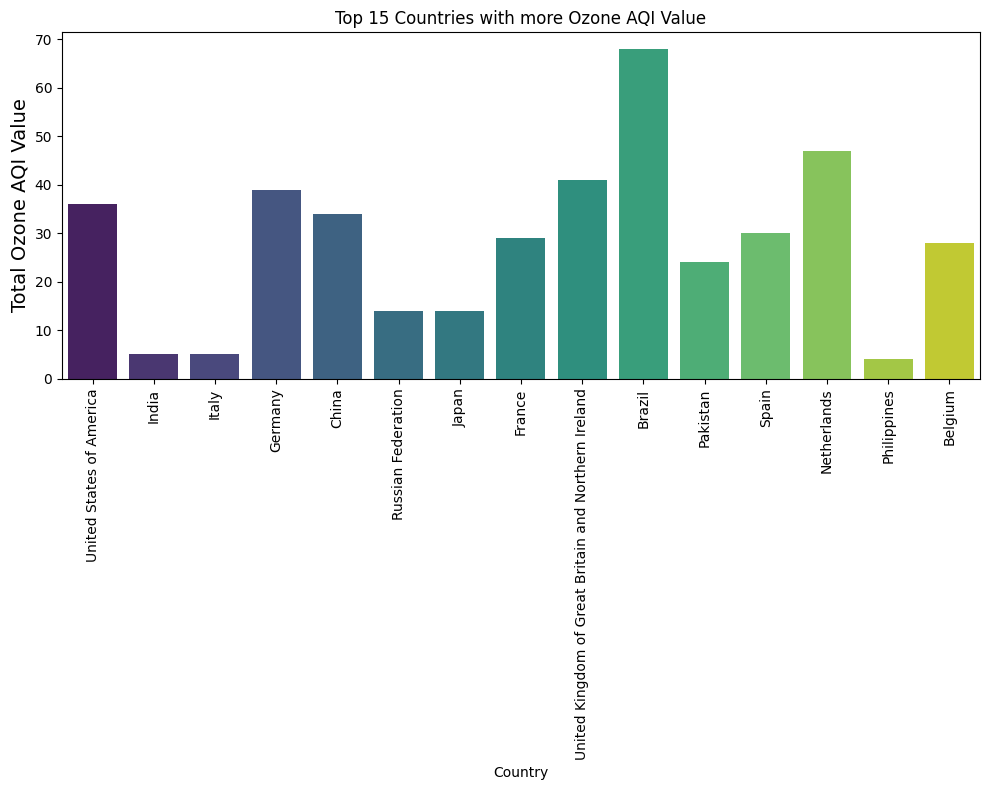

In [1463]:
aqi_value_columns = [
    'AQI Value',
    'CO AQI Value',
    'Ozone AQI Value',
    'NO2 AQI Value',
    'PM2.5 AQI Value'
]

high_ozone_value = (
    df.groupby("Country")['Ozone AQI Value']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(15)
)

plt.figure(figsize=(10, 8))
sns.barplot(data=high_ozone_value, x='Country', y=df['Ozone AQI Value'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 15 Countries with more Ozone AQI Value')
plt.ylabel('Total Ozone AQI Value', fontsize=14)
plt.tight_layout()
plt.show()



Outliers  
    'AQI Value',
    'CO AQI Value',
    'Ozone AQI Value',
    'NO2 AQI Value',
    'PM2.5 AQI Value'

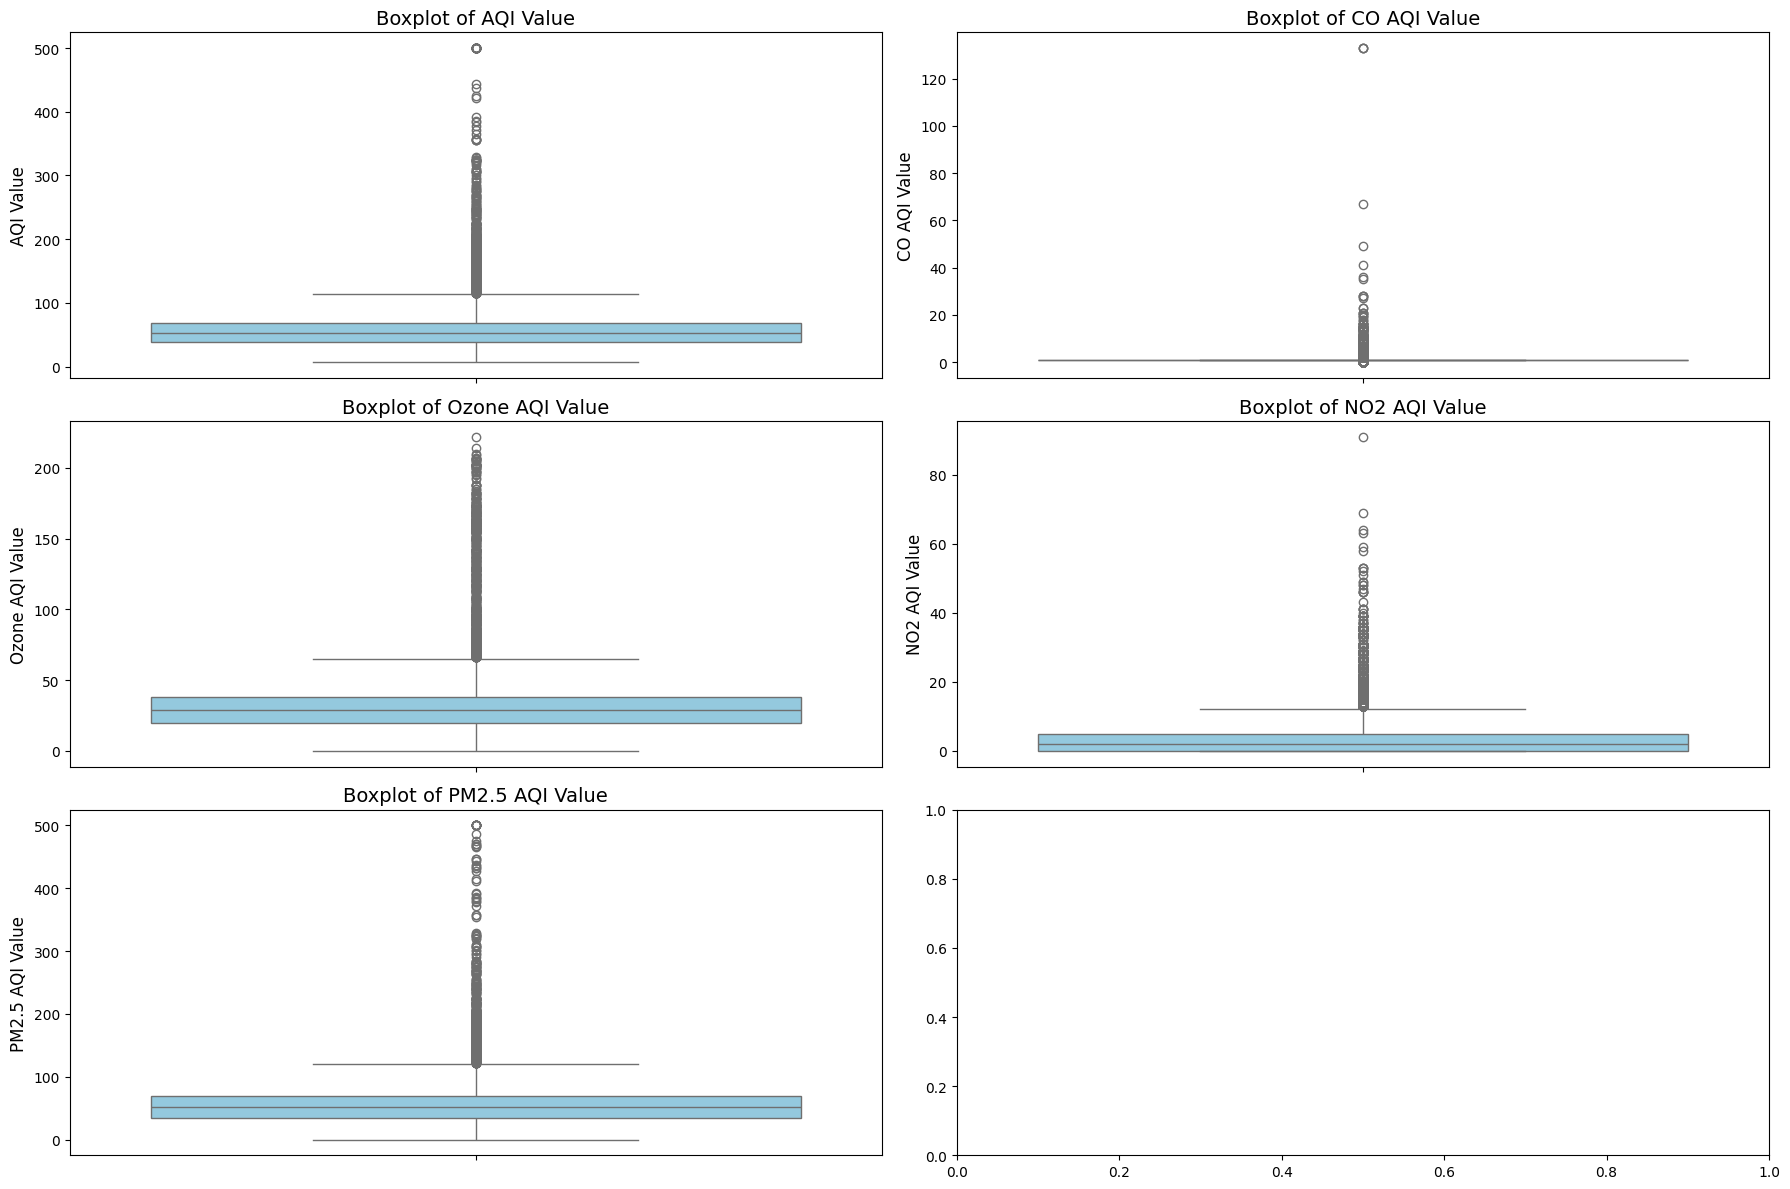

In [1464]:
num_plots = len(aqi_value_columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(aqi_value_columns):
    sns.boxplot(ax=axes[idx], data=df, y=col, color='skyblue')
    axes[idx].set_title(f'Boxplot of {col}', fontsize=14)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(col, fontsize=12)
plt.tight_layout()
plt.show()

Prepare data for modeling

In [1465]:
df_encoded.drop(['lat', 'lng'], axis=1, inplace=True)

In [1466]:
country_encoder = LabelEncoder()
city_encoder = LabelEncoder()

df_encoded['Country']= country_encoder.fit_transform(df_encoded['Country']) 
  
df_encoded['Country'].unique() 

array([130,  22,  75, 123, 166,  15,  33, 109,  54,  34, 129,  70,  53,
       144, 164,  69,  65, 122,  85,  58, 110, 100,  77,  48, 113, 145,
        73, 159,  43,  29, 152,  44,  28,   8, 124,  52,  67,  71,  74,
        42, 119,  92,  59,   6,  61, 116, 155,  94,  46,   5, 121,  45,
        10, 146,  62,  19,  32, 128,  79, 136,  47,  41,  93, 138, 162,
        17, 107,   1,  64, 135,  87, 169,  23, 143, 142, 120, 173,   9,
        38,  31,  66, 165,  27, 161,  39, 167, 127, 106,   4,  81, 172,
       104, 140, 151,  14, 114, 102,  97, 131,  21, 147,  25,  76,  80,
       141,  99, 111, 168, 126,  24,  26, 105,  98,  63, 163,  12,  50,
        13,   2, 134, 153, 154,  60,  88,  84,  18,  37,  56,  83,  90,
       170,  20, 133,  72,  96,  57,  89, 112,  30, 149, 157, 160,  55,
        51, 118, 156,  36,  35, 108,  78, 103,  49,  91,   7, 158,  16,
         3,  68, 117, 150, 139,  95,  11,  86, 137, 148,  40,   0, 171,
       115,  82, 132, 125, 101])

In [1467]:
df_encoded['City']= city_encoder.fit_transform(df_encoded['City']) 
  
df_encoded['City'].unique() 

array([ 9931,  9945,  9967, ...,  7526, 11022, 13400])

Index(['Country_x', 'City_x', 'AQI Value_x', 'AQI Category_x',
       'CO AQI Value_x', 'CO AQI Category_x', 'Ozone AQI Value_x',
       'Ozone AQI Category_x', 'NO2 AQI Value_x', 'NO2 AQI Category_x',
       'PM2.5 AQI Value_x', 'PM2.5 AQI Category_x', 'lat_x', 'lng_x',
       'Country_y', 'City_y', 'AQI Value_y', 'AQI Category_y',
       'CO AQI Value_y', 'CO AQI Category_y', 'Ozone AQI Value_y',
       'Ozone AQI Category_y', 'NO2 AQI Value_y', 'NO2 AQI Category_y',
       'PM2.5 AQI Value_y', 'PM2.5 AQI Category_y'],
      dtype='object')

In [1468]:
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [1469]:
df_encoded.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,9931,51,1,1,0,36,0,0,0,51,1
1,22,9945,41,0,1,0,5,0,1,0,41,0
2,22,9945,41,0,1,0,5,0,1,0,41,0
3,75,9967,66,1,1,0,39,0,2,0,66,1
4,123,9987,34,0,1,0,34,0,0,0,20,0


In [1510]:
df_encoded.to_csv("/Users/nandapop/Documents/Bootcamp/flask-render-integration/src/df_enconded.csv")
df_encoded.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

Heatmap

In [1471]:
target = 'AQI Category'
y = df_encoded[target]
X = df_encoded.drop(columns=[target, 'Country', 'City'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

In [1472]:
X_train.shape, X_test.shape

((13114, 9), (3279, 9))

In [1473]:
y_train.shape, y_test.shape

((13114,), (3279,))

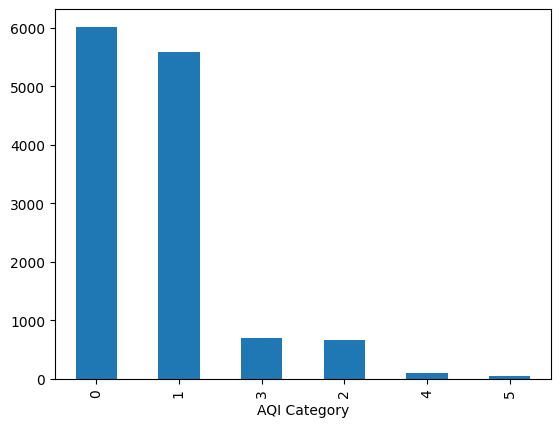

In [1474]:
y_train.value_counts().plot.bar()
plt.show()

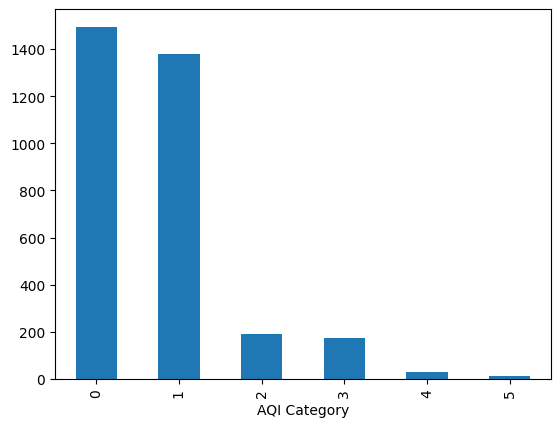

In [1475]:
y_test.value_counts().plot.bar()
plt.show()

Predicting AQI Levels

In [1476]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [1477]:
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [1478]:
params = {'criterion': ['gini','entropy'],
              'n_estimators': [10, 20, 40, 100, 150]}

In [1479]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_result = grid_search.best_score_
print(best_parameters)
print(best_result)

{'criterion': 'entropy', 'n_estimators': 100}
1.0


In [1480]:
clf = RandomForestClassifier(criterion='gini', n_estimators=20, random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=1)

In [1481]:
predict = clf.predict(X_test)
predict

array([0, 0, 1, ..., 1, 1, 0])

In [1482]:
y_test

5925     0
1020     0
8686     1
4574     1
2731     1
        ..
1793     0
7561     3
4795     1
13673    1
6291     0
Name: AQI Category, Length: 3279, dtype: int64

In [1483]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1495
           1       1.00      1.00      1.00      1381
           2       1.00      1.00      1.00       191
           3       1.00      1.00      1.00       173
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        12

    accuracy                           1.00      3279
   macro avg       1.00      1.00      1.00      3279
weighted avg       1.00      1.00      1.00      3279



In [1484]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [1485]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1495    0    0    0    0    0]
 [   0 1381    0    0    0    0]
 [   0    0  191    0    0    0]
 [   0    0    1  172    0    0]
 [   0    0    0    0   27    0]
 [   0    0    0    0    0   12]]


In [1486]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

In [1506]:
Classificador_AQI_RF = RandomForestClassifier(criterion='gini', n_estimators=20, random_state=1)
Classificador_AQI_RF.fit(X, y)

RandomForestClassifier(n_estimators=20, random_state=1)

In [1488]:
#pickle.dump(Classificador_AQI_RF, open("/Users/nandapop/Documents/Bootcamp/flask-render-integration/models/classificador_random_forest.sav", 'wb'))

Using KNN

In [1489]:
sd = StandardScaler()

In [1490]:
X_train_sd = sd.fit_transform(X_train)

In [1491]:
X_test_sd = sd.transform(X_test)

In [1492]:
knn = KNeighborsClassifier()

In [1493]:
params ={
    'n_neighbors' : range(1,40)
}

In [1494]:
gd = GridSearchCV(knn,param_grid=params,scoring='accuracy',cv=10)

In [1495]:
gd.fit(X_train_sd,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

In [1496]:
gd.best_params_

{'n_neighbors': 1}

In [1497]:
gd.best_score_

np.float64(0.9987799645587989)

In [1498]:
knn.fit(X_train_sd,y_train)

KNeighborsClassifier()

Prediction

In [1499]:
y_hat = knn.predict(X_test_sd)

Model Evaluation

In [1500]:
print(accuracy_score(y_test,y_hat))

0.9990850869167429


In [1501]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1495
           1       1.00      1.00      1.00      1381
           2       1.00      0.99      1.00       191
           3       0.98      1.00      0.99       173
           4       1.00      0.93      0.96        27
           5       1.00      1.00      1.00        12

    accuracy                           1.00      3279
   macro avg       1.00      0.99      0.99      3279
weighted avg       1.00      1.00      1.00      3279



In [1502]:
print(confusion_matrix(y_test,y_hat))

[[1495    0    0    0    0    0]
 [   0 1381    0    0    0    0]
 [   0    0  190    1    0    0]
 [   0    0    0  173    0    0]
 [   0    0    0    2   25    0]
 [   0    0    0    0    0   12]]


In [1507]:
model = {
    'classifier': Classificador_AQI_RF,
    'country_encoder': country_encoder,
    'city_encoder': city_encoder
}
with open('/Users/nandapop/Documents/Bootcamp/flask-render-integration/models/classificador_random_forest_with_encoders.sav', 'wb') as f:
    pickle.dump(model, f)

In [1511]:

with open('/Users/nandapop/Documents/Bootcamp/flask-render-integration/models/classificador_random_forest_with_encoders.sav', 'rb') as f:
    model = pickle.load(f)

classifier = model['classifier']

feature_names = [
    'Encoded Country', 'Encoded City', 'AQI Value', 'CO AQI Value',
    'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'
]

print("Feature importances and names:")
for name, importance in zip(feature_names, classifier.feature_importances_):
    print(f"{name}: {importance}")


Feature importances and names:
Encoded Country: 0.4604146725225523
Encoded City: 0.029263082302397353
AQI Value: 8.200392347280303e-06
CO AQI Value: 0.015911089587868594
Ozone AQI Value: 0.012548753310973331
NO2 AQI Value: 0.006289973130573742
PM2.5 AQI Value: 5.1724107757401683e-05
